# Google Trends (selenium) parser

In [1]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys

import time
import pickle
import csv
import numpy as np
import pandas as pd
import re
import os  # позволяет удалять файлы прямо из питона

from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
def open_and_save(words, sleep_time=15):
    """
    Download search dynamic to download folder
        words list(str)
            list of words (five is maximum)
        sleep_time float
            the delay time
    """
    
    words = ', '.join(words)
    
    driver = webdriver.Chrome(executable_path=r'./chromedriver')
    time.sleep(sleep_time)
    driver.get('https://www.google.ru')
    time.sleep(sleep_time)

    driver.get("https://www.google.ru/trends/explore?date=all&geo=RU&q="+words)
    time.sleep(sleep_time)  # otherwise, the page does not have time to load
    
    csv_knopka = driver.find_element_by_xpath('/html/body/div[2]/div[2]/div/md-content/div/div/div[1]/trends-widget/ng-include/widget/div/div/div/widget-actions/div/button[1]')
    csv_knopka.click()
    time.sleep(sleep_time)
    driver.close()
    pass


def topic_top(topic, path = '/Users/fulyankin/Downloads'):
    """
    Find the most google word
        topic list (str)
            list of words
    """
    
    if len(topic) == 1:
        print('\n \n')
        return topic[0]
    
    fives = [topic[5*i:5*(i+1)] for i in range(len(topic)//5)]
    if len(topic)%5 != 0 :
        fives += [topic[-(len(topic)%5) :]]
    print(fives)
    
    top = []
    for item in fives:
        print(item)
        open_and_save(item)
        
        time.sleep(3)
        df = pd.read_csv(path + '/multiTimeline.csv', header=1, sep=',')
        s = ((df == 100)|(df == '100')).sum()[1:] 
        most_pop = s[s == 1].index[0]
        
        print(most_pop)
        top.append(most_pop.split(':')[0])
        os.remove(path+'/multiTimeline.csv')   
    print(top)
    # recursion, motherfucka
    return topic_top(top)


def topic_download(tpic, best, path = '/Users/fulyankin/Downloads'):
    """
    Download statisitc
        topic list (str)
            list of words
        best str
            the most google word
    """
    topic = tpic.copy()
    topic.remove(best)
    data = pd.DataFrame( )
    
    foves = [topic[4*i:4*(i+1)] for i in range(len(topic) // 4)]
    if len(topic)%4 != 0 :
        foves += [topic[-(len(topic)%4) :]]
    print(foves)

    open_and_save([best] + foves[-1])
    time.sleep(3)
    df = pd.read_csv(path + '/multiTimeline.csv', header=1, sep=',')
    data[df.columns] = df[df.columns]
    os.remove(path + '/multiTimeline.csv')

    for item in foves[:(len(foves)-1)]:
        open_and_save([best] + item)
        time.sleep(3)
        df = pd.read_csv(path + '/multiTimeline.csv', header=1, sep=',')
        data[df.columns[2:]] = df[df.columns[2:]]
        os.remove(path+'/multiTimeline.csv')
    return(data)


def self_download(topic, path = '/Users/fulyankin/Downloads'):
    """
    Downloads information independently by words
        topic list (str)
            list of words
    """
    
    data = pd.DataFrame( )

    open_and_save([topic[-1]])
    time.sleep(3)
    df = pd.read_csv(path + '/multiTimeline.csv', header=1, sep=',')
    data[df.columns] = df[df.columns]
    os.remove(path + '/multiTimeline.csv')

    for item in topic[:(len(topic)-1)]:
        print(item, data.shape)
        open_and_save([item])
        time.sleep(3)
        df = pd.read_csv(path + '/multiTimeline.csv', header=1, sep=',')
        data[df.columns[1:]]=df[df.columns[1:]]
        os.remove(path + '/multiTimeline.csv')
    return(data)

In [3]:
krizis = ['банк', 'курс доллара', 'евро', 'ЦБ', 'РТС', 'ММВБ', 'акция', 'ипотека', 
         'взять кредит', 'ПИФ', 'банкротство', 'залог', 'дефолт', 'девальвация', 
         'финансовый кризис']

# krizis = ['сфера', 'снизить', 'сократить', 'вывести', 'военный',
#           'освободить', 'космический', 'обеспечить', 'силовик', 
#           'возглавить', 'резолюция', 'хакер', 'расследование']

# krizis = ['прокуратура', 'евро', 'замглавы', 'финансирование',
#           'оштрафовать', 'обыск', 'днр', 'столкновение', 'народ', 
#           'сектор', 'дума', 'турецкий', 'призвать', 'российский','зенит']


top_word = topic_top(krizis)

df_poisk = topic_download(krizis, top_word)

[['банк', 'курс доллара', 'евро', 'ЦБ', 'РТС'], ['ММВБ', 'акция', 'ипотека', 'взять кредит', 'ПИФ'], ['банкротство', 'залог', 'дефолт', 'девальвация', 'финансовый кризис']]
['банк', 'курс доллара', 'евро', 'ЦБ', 'РТС']
курс доллара: (Россия)
['ММВБ', 'акция', 'ипотека', 'взять кредит', 'ПИФ']
ипотека: (Россия)
['банкротство', 'залог', 'дефолт', 'девальвация', 'финансовый кризис']
финансовый кризис: (Россия)
['курс доллара', 'ипотека', 'финансовый кризис']
[['курс доллара', 'ипотека', 'финансовый кризис']]
['курс доллара', 'ипотека', 'финансовый кризис']
курс доллара: (Россия)
['курс доллара']

 

[['банк', 'евро', 'ЦБ', 'РТС'], ['ММВБ', 'акция', 'ипотека', 'взять кредит'], ['ПИФ', 'банкротство', 'залог', 'дефолт'], ['девальвация', 'финансовый кризис']]


In [4]:
df_poisk.head()

,Месяц,курс доллара: (Россия),девальвация: (Россия),финансовый кризис: (Россия),банк: (Россия),евро: (Россия),ЦБ: (Россия),РТС: (Россия),ММВБ: (Россия),акция: (Россия),ипотека: (Россия),взять кредит: (Россия),ПИФ: (Россия),банкротство: (Россия),залог: (Россия),дефолт: (Россия)
0,2004-01,5,0,0,29,1,5,0,1,0,0,0,2,0,1,0
1,2004-02,1,0,0,32,0,5,1,0,1,4,0,1,0,0,0
2,2004-03,3,0,0,22,4,4,1,0,1,3,0,1,1,1,0
3,2004-04,2,0,0,34,1,2,1,0,2,2,1,0,4,0,0
4,2004-05,5,0,0,25,7,3,1,2,1,1,1,0,1,0,0


<AxesSubplot:xlabel='Месяц'>

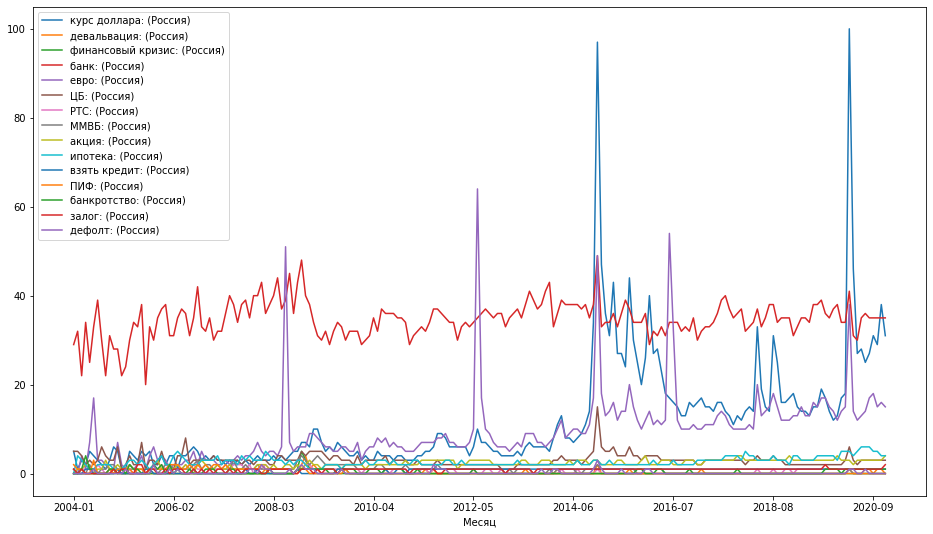

In [5]:
df_poisk = df_poisk.replace({'<1' : 0})
for item in df_poisk.columns[1:]:
    df_poisk[item] = df_poisk[item].astype(float)

df_poisk.set_index('Месяц').plot(legend=True, figsize=(16,9))

In [6]:
df_poisk.to_csv('krizis_poisk_month.tsv', sep="\t", index=None)

In [7]:
df_poisk_odinar = self_download(krizis)

банк (204, 2)
курс доллара (204, 3)
евро (204, 4)
ЦБ (204, 5)
РТС (204, 6)
ММВБ (204, 7)
акция (204, 8)
ипотека (204, 9)
взять кредит (204, 10)
ПИФ (204, 11)
банкротство (204, 12)
залог (204, 13)
дефолт (204, 14)
девальвация (204, 15)


In [8]:
df_poisk_odinar.head()

,Месяц,финансовый кризис: (Россия),банк: (Россия),курс доллара: (Россия),евро: (Россия),ЦБ: (Россия),РТС: (Россия),ММВБ: (Россия),акция: (Россия),ипотека: (Россия),взять кредит: (Россия),ПИФ: (Россия),банкротство: (Россия),залог: (Россия),дефолт: (Россия),девальвация: (Россия)
0,2004-01,0,59,4,2,33,0,30,0,0,0,84,0,69,0,0
1,2004-02,0,65,4,0,32,35,0,28,58,0,41,0,0,0,0
2,2004-03,0,46,0,7,29,42,0,33,46,0,48,33,79,0,0
3,2004-04,0,68,3,2,14,31,0,49,35,74,0,100,0,0,0
4,2004-05,0,52,4,10,19,28,47,22,15,66,0,22,0,0,0


<AxesSubplot:xlabel='Месяц'>

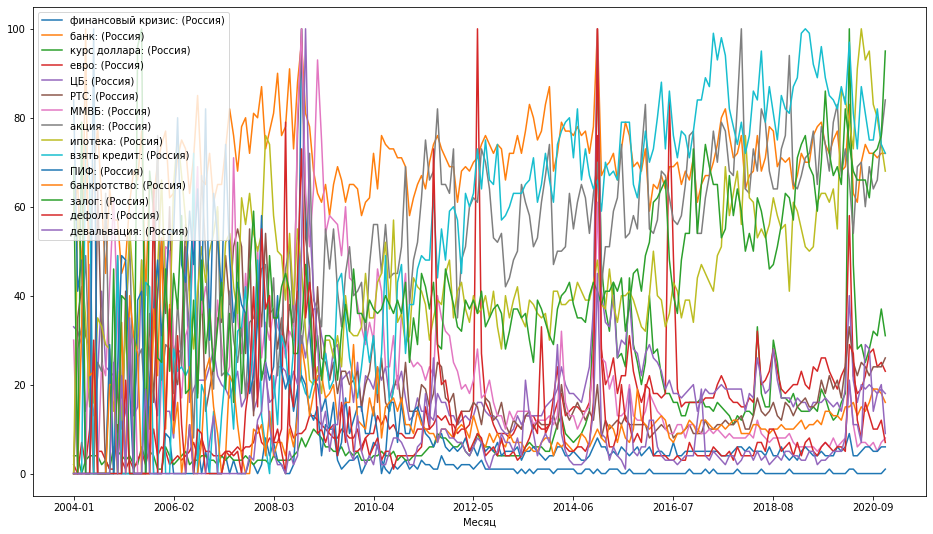

In [9]:
df_poisk_odinar = df_poisk_odinar.replace({'<1' : 0})
for item in df_poisk_odinar.columns[1:]:
    df_poisk_odinar[item] = df_poisk_odinar[item].astype(float)

df_poisk_odinar.set_index('Месяц').plot(legend=True, figsize=(16,9))

In [10]:
df_poisk_odinar.to_csv('krizis_poisk_odinar_week.tsv', sep="\t", index=None)